Mount Google Drive (optional)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler
from matplotlib.animation import FuncAnimation
import csv
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# import re
# from bs4 import BeautifulSoup

outputs = {}

In [2]:
class Dense():
    def __init__(self, n_x, n_y, seed=1):
        self.n_x = n_x
        self.n_y = n_y
        self.seed = seed
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Argument:
        self.n_x -- size of the input layer
        self.n_y -- size of the output layer
        self.parameters -- python dictionary containing your parameters:
                           W -- weight matrix of shape (n_x, n_y)
                           b -- bias vector of shape (1, n_y)
        """
        sd = np.sqrt(6.0 / (self.n_x + self.n_y))
        np.random.seed(self.seed)
        W = np.random.uniform(-sd, sd, (self.n_y, self.n_x)).T      # the transpose here is just for the code to be compatible with the old codes
        b = np.zeros((1, self.n_y))

        assert(W.shape == (self.n_x, self.n_y))
        assert(b.shape == (1, self.n_y))

        self.parameters = {"W": W, "b": b}

    def forward(self, A):
        """
        Implement the linear part of a layer's forward propagation.

        Arguments:
        A -- activations from previous layer (or input data) with the shape (n, f^[l-1])
        self.cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently

        Returns:
        Z -- the input of the activation function, also called pre-activation parameter with the shape (n, f^[l])
        """

        # GRADED FUNCTION: linear_forward
        ### START CODE HERE ###
        w = self.parameters["W"]
        b = self.parameters["b"]
        Z = np.dot(A, w) + b
        self.cache = (A, w, b)
        ### END CODE HERE ###

        assert(Z.shape == (A.shape[0], self.parameters["W"].shape[1]))

        return Z

    def backward(self, dZ):
        """
        Implement the linear portion of backward propagation for a single layer (layer l)

        Arguments:
        dZ -- Gradient of the loss with respect to the linear output (of current layer l), same shape as Z
        self.cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer
        self.dW -- Gradient of the loss with respect to W (current layer l), same shape as W
        self.db -- Gradient of the loss with respect to b (current layer l), same shape as b

        Returns:
        dA_prev -- Gradient of the loss with respect to the activation (of the previous layer l-1), same shape as A_prev

        """
        A_prev, W, b = self.cache
        m = A_prev.shape[0]

        # GRADED FUNCTION: linear_backward
        ### START CODE HERE ###
        self.dW = np.dot(A_prev.T, dZ) / m
        self.db = np.sum(dZ, axis=0, keepdims=True) / m
        dA_prev = np.dot(dZ, W.T)
        ### END CODE HERE ###

        assert (dA_prev.shape == A_prev.shape)
        assert (self.dW.shape == self.parameters["W"].shape)
        assert (self.db.shape == self.parameters["b"].shape)

        return dA_prev

    def update(self, learning_rate):
        """
        Update parameters using gradient descent

        Arguments:
        learning rate -- step size
        """

        # GRADED FUNCTION: linear_update_parameters
        ### START CODE HERE ###
        self.parameters["W"] = self.parameters["W"] - learning_rate * self.dW
        self.parameters["b"] = self.parameters["b"] - learning_rate * self.db
        ### END CODE HERE ###

In [3]:
class Activation():
    def __init__(self, activation_function, loss_function):
        self.activation_function = activation_function
        self.loss_function = loss_function
        self.cache = None

    def forward(self, Z):
        if self.activation_function == "sigmoid":
            """
            Implements the sigmoid activation in numpy

            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of sigmoid(z), same shape as Z
            """

            # GRADED FUNCTION: sigmoid_forward
            ### START CODE HERE ###
            A = 1 / (1 + np.exp(-Z))
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "relu":
            """
            Implement the RELU function in numpy
            Arguments:
            Z -- numpy array of any shape
            self.cache -- stores Z as well, useful during backpropagation
            Returns:
            A -- output of relu(z), same shape as Z

            """

            # GRADED FUNCTION: relu_forward
            ### START CODE HERE ###
            A = np.maximum(0, Z)
            self.cache = Z
            ### END CODE HERE ###

            assert(A.shape == Z.shape)

            return A
        elif self.activation_function == "softmax":
            """
            Implements the softmax activation in numpy

            Arguments:
            Z -- np.array with shape (n, C)
            self.cache -- stores Z as well, useful during backpropagation

            Returns:
            A -- output of softmax(z), same shape as Z
            """

            # GRADED FUNCTION: softmax_forward
            ### START CODE HERE ###
            eZ = np.exp(Z - np.max(Z, axis=1, keepdims=True))
            A = eZ / np.sum(eZ, axis=1, keepdims=True)
            self.cache = Z
            ### END CODE HERE ###

            return A
        elif self.activation_function == "linear":
            """
            Linear activation (returns Z directly).
            """
            self.cache = Z.copy()
            return Z

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")


    def backward(self, dA=None, Y=None):
        if self.activation_function == "sigmoid":
            """
            Implement the backward propagation for a single SIGMOID unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: sigmoid_backward
            ### START CODE HERE ###
            Z = self.cache
            sigmoid = 1 / (1 + np.exp(-Z))
            dZ = dA * sigmoid * (1 - sigmoid)
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "relu":
            """
            Implement the backward propagation for a single RELU unit.
            Arguments:
            dA -- post-activation gradient, of any shape
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the loss with respect to Z
            """

            # GRADED FUNCTION: relu_backward
            ### START CODE HERE ###
            Z = self.cache
            dZ = np.array(dA, copy=True)
            dZ[Z <= 0] = 0
            ### END CODE HERE ###

            assert (dZ.shape == Z.shape)

            return dZ

        elif self.activation_function == "softmax":
            """
            Implement the backward propagation for a [SOFTMAX->CCE LOSS] unit.
            Arguments:
            Y -- true "label" vector (one hot vector, for example: [1,0,0] represents rock, [0,1,0] represents paper, [0,0,1] represents scissors
                                      in a Rock-Paper-Scissors, shape: (n, C)
            self.cache -- 'Z' where we store for computing backward propagation efficiently
            Returns:
            dZ -- Gradient of the cost with respect to Z
            """

            # GRADED FUNCTION: softmax_backward
            ### START CODE HERE ###
            Z = self.cache
            softmax = np.exp(Z - np.max(Z, axis=1, keepdims=True))
            softmax = softmax / np.sum(softmax, axis=1, keepdims=True)
            dZ = softmax - Y
            ### END CODE HERE ###

            assert (dZ.shape == self.cache.shape)

            return dZ

        elif self.activation_function == "linear":
            """
            Backward propagation for linear activation.
            """
            return dA

        else:
            raise ValueError(f"Unsupported activation function: {self.activation_function}")

In [4]:
class Model():
    def __init__(self, units, activation_functions, loss_function):
        self.units = units
        self.activation_functions = activation_functions
        self.loss_function = loss_function
        self.initialize_parameters()

    def initialize_parameters(self):
        """
        Initialize layers of the neural network

        Arguments:
            self.units -- array defining network structure (e.g., [4,4,1]):
                - Input layer: 4 nodes
                - Hidden layer: 4 nodes
                - Output layer: 1 node
            self.activation_functions -- activation function for each layer (e.g., ["relu","sigmoid"]):
                - First layer uses ReLU
                - Second layer uses Sigmoid
            self.loss_function -- loss function type: "cross_entropy" or "mse"
        """
        self.linear = []        # Store all Dense layers (weights & biases)
        self.activation = []    # Store all activation function layers

        for i in range(len(self.units)-1):
            dense = Dense(self.units[i], self.units[i+1], i)
            self.linear.append(dense)

        for i in range(len(self.activation_functions)):
            self.activation.append(Activation(self.activation_functions[i], self.loss_function))

    def forward(self, X):
        """
        Forward propagation through the network

        Arguments:
        X -- input data: shape (n, f)
        Returns:
        A -- model output:
            - For binary classification: probability (0-1)
            - For multi-class: probability distribution across classes
            - For regression: predicted values
        """
        A = X

        # GRADED FUNCTION: model_forward
        ### START CODE HERE ###
        for i in range(len(self.linear)):
          Z = self.linear[i].forward(A) # forward
          A = self.activation[i].forward(Z) # activation
        ### END CODE HERE ###

        return A

    def backward(self, AL=None, Y=None):
        """
        Backward propagation to compute gradients

        Arguments:
            AL -- model output from forward propagation:
                - For binary: probability (n,1)
                - For multi-class: probabilities (n,C)
            Y -- true labels:
                - For binary: 0/1 labels (n,1)
                - For multi-class: one-hot vectors (n,C)
                - For regression: true values (n,1)

        Returns:
            dA_prev -- gradients for previous layer's activation
        """

        L = len(self.linear)
        C = Y.shape[1]

        # assertions
        warning = 'Warning: only the following 3 combinations are allowed! \n \
                    1. binary classification: sigmoid + cross_entropy \n \
                    2. multi-class classification: softmax + cross_entropy \n \
                    3. regression: linear + mse'
        assert self.loss_function in ["cross_entropy", "mse"], "you're using undefined loss function!"
        if self.loss_function == "cross_entropy":
            if Y.shape[1] == 1:  # binary classification
                assert self.activation_functions[-1] == 'sigmoid', warning
            else:  # multi-class classification
                assert self.activation_functions[-1] == 'softmax', warning
                assert self.units[-1] == Y.shape[1], f"you should set last dim to {Y.shape[1]}(the number of classes) in multi-class classification!"
        elif self.loss_function == "mse":
            assert self.activation_functions[-1] == 'linear', warning
            assert self.units[-1] == Y.shape[1], "output dimension mismatch for regression!"

        # GRADED FUNCTION: model_backward
        ### START CODE HERE ###
        dAL = 0.0
        # Initializing the backpropagation
        if self.loss_function == "cross_entropy":
          dAL = (-1 * (Y / (AL + 0.00001))) + ((1 - Y) / (1 - AL + 0.00001))
        elif self.loss_function == "mse":
          dAL = AL - Y

        if self.activation_functions[-1] == "linear":
          # Lth layer (LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
          dZ = dAL
          dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "sigmoid":
          # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL". Outputs: "dA_prev"
          dZ = self.activation[-1].backward(dAL)
          dA_prev = self.linear[-1].backward(dZ)

        elif self.activation_functions[-1] == "softmax":
          dZ = self.activation[-1].backward(Y=Y)
          dA_prev = self.linear[-1].backward(dZ)

        # Loop from l=L-2 to l=0
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "dA_prev". Outputs: "dA_prev"
        for l in reversed(range(L - 1)):
          dZ = self.activation[l].backward(dA_prev)
          dA_prev = self.linear[l].backward(dZ)
        ### END CODE HERE ###

        return dA_prev

    def update(self, learning_rate):
        """
        Arguments:
        learning_rate -- step size
        """

        L = len(self.linear)

        # GRADED FUNCTION: model_update_parameters
        ### START CODE HERE ###
        for l in self.linear:
          l.update(learning_rate)
        ### END CODE HERE ###

In [5]:
def compute_MSE_loss(AL, Y):
    # 檢查 AL 和 Y 是否有 NaN 或無效值
    if np.any(np.isnan(AL)) or np.any(np.isnan(Y)):
        raise ValueError("AL or Y contains NaN values!")
    if np.any(np.isinf(AL)) or np.any(np.isinf(Y)):
        raise ValueError("AL or Y contains Inf values!")

    # 防止 m 為 0
    m = Y.shape[0]
    if m == 0:
        raise ValueError("Number of samples (m) is zero, cannot compute loss.")

    # 計算 MSE loss
    loss = (1 / m) * np.sum(np.square(AL - Y))
    return loss

# compute_MSE_loss (MSE)
def compute_MSE_loss(AL, Y):
    m = Y.shape[0]
    loss = (1/m) * np.sum(np.square(AL - Y))
    return loss

In [6]:
# def predict(x, y_true, model):
#     """
#     This function is used to predict the results of a  L-layer neural network.

#     Arguments:
#     x -- data set of examples you would like to label
#     model -- trained model

#     Returns:
#     y_pred -- predictions for the given dataset X
#     """

#     n = x.shape[0]

#     # Forward propagation
#     y_pred = model.forward(x)

#     # this transform the output and label of binary classification when using sigmoid + cross entropy for evaluation
#     # eg. y_pred: [[0.8], [0.2], [0.1]] -> [[0.2, 0.8], [0.8, 0.2], [0.9, 0.1]]
#     # eg. y_true: [[1], [0], [0]] -> [[0, 1], [1, 0], [1, 0]]
#     if y_pred.shape[-1] == 1:
#         y_pred = np.array([[1 - y[0], y[0]] for y in y_pred])
#         if y_true is not None:
#             y_true = np.array([[1,0] if y == 0 else [0,1] for y in y_true.reshape(-1)])

#     # make y_pred/y_true become one-hot prediction result
#     # eg. y_true: [[1, 0, 0], [0, 0, 1], [0, 1, 0]] -> [0, 2, 1]
#     # eg. y_pred: [[0.2, 0.41, 0.39], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]] -> [1, 1, 2]
#     if y_true is not None:
#         y_true = np.argmax(y_true, axis=1)
#     y_pred = np.argmax(y_pred, axis=1)

#     if y_true is not None:
#         # compute accuracy
#         correct = 0
#         for yt, yp in zip(y_true, y_pred):
#             if yt == yp:
#                 correct += 1
#         print(f"Accuracy: {correct/n * 100:.2f}%")

#         # f1_scores = f1_score(y_true, y_pred, average=None)
#         # print(f'f1 score for each class: {f1_scores}')
#         # print(f'f1_macro score: {np.mean(np.array(f1_scores)):.2f}')
#         MAPE = calculate_MAPE(y_pred, y_true)
#         print(f"MAPE: {MAPE}")

#     return y_pred

def save_prediction_data(predicted_y):
    # Create DataFrame with ID, x, and y columns
    df = pd.DataFrame({
        'ID': range(len(predicted_y)),  # Add ID column starting from 0
        'y': predicted_y
    })

    # Ensure ID is the first column
    df = df[['ID', 'y']]

    # Save to CSV file
    df.to_csv('Lab4_basic_regression.csv', index=False)
    print("Prediction data saved as 'Lab4_basic_regression.csv'")

def animate_training(history, X_train, Y_train):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 11)
    ax.set_ylim(-5, 5)
    line, = ax.plot([], [], 'b-', lw=1, label='Predicted')

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()
    ax.plot(ground_truth_x, ground_truth_y, 'r-', lw=1, label='Ground Truth')

    # show current epoch on the animation / 100 epoch
    epoch_text = ax.text(0.05, 0.95, '', transform=ax.transAxes, fontsize=12, verticalalignment='top')

    def init():
        line.set_data([], [])
        epoch_text.set_text('')
        return line, epoch_text

    def update(frame):
        epoch = (frame + 1) * 100
        _, predicted_y = history[frame]
        predicted_x = X_train.flatten()
        line.set_data(predicted_x, predicted_y.flatten())

        epoch_text.set_text(f'Epoch: {epoch}')

        return line, epoch_text

    ani = FuncAnimation(fig, update, frames=len(history), init_func=init, blit=True, interval=50)

    # save as gif
    ani.save('Lab4_basic_regression.gif', writer='pillow')
    plt.close(fig)
    print(f"Animation saved as 'Lab4_basic_regression.gif'")


def save_final_result(model, X_train, Y_train):
    AL = model.forward(X_train)

    predicted_x = X_train.flatten()
    predicted_y = AL.flatten()

    plt.plot(predicted_x, predicted_y, 'b-', label="Predicted", lw=1)

    ground_truth_x = X_train.flatten()
    ground_truth_y = Y_train.flatten()

    save_prediction_data(predicted_y)

    plt.plot(ground_truth_x, ground_truth_y, 'r-', label='Ground Truth', lw=1)

    plt.legend()

    plt.ylim(-5, 5)
    plt.xlim(0, 11)
    plt.savefig("Lab4_basic_regression.jpg")
    plt.show()
    print("Prediction saved as 'Lab4_basic_regression.jpg'")



In [7]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    """
    Creates a list of random minibatches from (X, Y)

    Arguments:
    X -- input data, of shape (n, f^{0})
    Y -- true "label" vector, of shape (n, C)
    mini_batch_size -- size of the mini-batches, integer

    Returns:
    mini_batches -- list of synchronous (mini_batch_X, mini_batch_Y)
    """

    m = X.shape[0]                  # number of training examples
    mini_batches = []
    ### START CODE HERE ###

    # Step 1: Shuffle (X, Y)
    # permutation = list(np.random.permutation(m))
    # shuffled_X = X[permutation, :]
    # shuffled_Y = Y[permutation, :]

    permutation = np.random.permutation(m)
    shuffled_X = X[permutation]
    shuffled_Y = Y[permutation]

    # Step 2 - Partition (shuffled_X, shuffled_Y).
    # Cases with a complete mini batch size only i.e each of 64 examples.
    num_complete_minibatches = math.floor(m / mini_batch_size) # number of mini batches of size mini_batch_size in your partitionning
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch_Y = shuffled_Y[k * mini_batch_size : k * mini_batch_size + mini_batch_size, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        # mini_batch_X = shuffled_X[k * mini_batch_size : m - 1]
        # mini_batch_Y = shuffled_Y[k * mini_batch_size : m - 1]
        # mini_batch = (mini_batch_X, mini_batch_Y)
        # mini_batches.append(mini_batch)

    # For handling the end case (last mini-batch < mini_batch_size i.e less than 64)
    if m % mini_batch_size != 0:
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size : m, :]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    ### END CODE HERE ###

    return mini_batches

def train_model(model, X_train, Y_train, learning_rate, num_iterations, batch_size=None, print_loss=True, print_freq=1000, decrease_freq=100, decrease_proportion=0.99):
    """
    Trains the model using mini-batch gradient descent

    Arguments:
    model -- the model to be trained
    X_train -- training set, of shape (num_px * num_px * 3, m_train)
    Y_train -- training labels, of shape (1, m_train)
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    batch_size -- size of a mini batch
    print_loss -- if True, print the loss every print_freq iterations
    print_freq -- print frequency
    decrease_freq -- learning rate decrease frequency
    decrease_proportion -- learning rate decrease proportion

    Returns:
    model -- the trained model
    losses -- list of losses computed during the optimization
    history -- list of (X_train, Y_pred) tuples for visualization
    """

    history = []
    losses = []

    for i in range(num_iterations):
        ### START CODE HERE ###
        # Define mini batches
        mini_batches = [(X_train, Y_train)]
        if batch_size:
            mini_batches = random_mini_batches(X_train, Y_train, batch_size)
        else:
            # if batch_size is None, batch is not used, mini_batch = whole dataset
            mini_batches = [(X_train, Y_train)]

        epoch_loss = 0
        for batch in mini_batches:
            X_batch, Y_batch = batch

            # Forward pass
            AL = model.forward(X_batch)

            # Compute loss
            # if model.loss_function == 'cross_entropy':
            #     if model.activation_functions[-1] == "sigmoid": # Binary classification
            #         loss = compute_BCE_loss(AL, Y_batch)
            #     elif model.activation_functions[-1] == "softmax": # Multi-class classification
            #         loss = compute_CCE_loss(AL, Y_batch)
            # elif model.loss_function == 'mse': # Regression
            #     loss = compute_MSE_loss(AL, Y_batch)
            loss = compute_MSE_loss(AL, Y_batch)
            epoch_loss += loss

            # Backward pass
            model.backward(AL, Y_batch)

            # Update parameters
            model.update(learning_rate)

        epoch_loss /= len(mini_batches)
        losses.append(epoch_loss)
        ### END CODE HERE ###

        # Print loss
        if print_loss and i % print_freq == 0:
            print(f"Loss after iteration {i}: {epoch_loss}")

        # Store history
        if i % 100 == 0:
            history.append((X_train, model.forward(X_train)))

        # Decrease learning rate
        if i % decrease_freq == 0 and i > 0:
            learning_rate *= decrease_proportion

    return model, losses, history


In [ ]:
# def preprocessor(text):
#     # remove HTML tags
#     text = BeautifulSoup(text, 'html.parser').get_text()

#     # regex for matching emoticons, keep emoticons, ex: :), :-P, :-D
#     r = '(?::|;|=|X)(?:-)?(?:\)|\(|D|P)'
#     emoticons = re.findall(r, text)
#     text = re.sub(r, '', text)

#     # convert to lowercase and append all emoticons behind (with space in between)
#     # replace('-','') removes nose of emoticons
#     text = re.sub('[\W]+', ' ', text.lower()) + ' ' + ' '.join(emoticons).replace('-','')
#     return text

# nltk.download('stopwords')
# stop = stopwords.words('english')

# def tokenizer_stem_nostop(text):
#     porter = PorterStemmer()
#     return [porter.stem(w) for w in re.split('\s+', text.strip()) \
#             if w not in stop and re.match('[a-zA-Z]+', w)]


In [8]:
def preProcessed(x, y):
    y = y[:, np.newaxis]
    combined = np.hstack((x, y))
    nan_removed = combined[~np.isnan(combined).any(axis=1)]
    x_train = nan_removed[:, :-1]
    y_train = nan_removed[:, -1:]
    scaler = StandardScaler()
    x_train = scaler.fit_transform(x_train)
    y_train = scaler.fit_transform(y_train)
    x_train[:, 0] = np.where(x_train[:, 0] > 0, np.log10(x_train[:, 0].clip(min=1e-10)), x_train[:, 0])
    x_train[:, 1] = np.where(x_train[:, 1] > 0, np.log10(x_train[:, 1].clip(min=1e-10)), x_train[:, 1])
    x_train[:, 2] = np.where(x_train[:, 2] > 0, np.log10(x_train[:, 2].clip(min=1e-10)), x_train[:, 2])
    y_train[:, 0] = np.where(y_train[:, 0] > 0, np.log10(y_train[:, 0].clip(min=1e-10)), y_train[:, 0])
    # x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
    # y_train = (y_train - np.mean(y_train)) / np.std(y_train)
    return x_train, y_train

In [9]:
def split_data(X_train, Y_train, split_ratio=0.2):

    x_split_size = int(len(X_train) * split_ratio)
    y_split_size = int(len(Y_train) * split_ratio)
    x_train = X_train[x_split_size:]
    y_train = Y_train[y_split_size:]
    x_val = X_train[:x_split_size]
    y_val = Y_train[:y_split_size]

    return x_train, y_train, x_val, y_val


In [12]:
# load training data
data_root = "out.csv"
with open(data_root, newline='') as csvfile:
    datalist = pd.read_csv(data_root)

In [ ]:
# count = CountVectorizer(ngram_range=(1, 1),
#                         preprocessor=preprocessor,
#                         tokenizer=tokenizer_stem_nostop)
# datal = datalist.to_numpy()
# count.fit(datal[:,7])
# BoW = count.vocabulary_
# print('[vocabulary]\n{}'.format(BoW))
# doc_bag = count.transform(datal[:,7])
# doc_bag = doc_bag.toarray()
# print(doc_bag)

x_train shape: (1585, 3), y_train shape: (1585, 1)
x_val shape: (396, 3), y_val shape: (396, 1)
Loss after iteration 0: 0.007475833864810935
Loss after iteration 1000: 0.003411428869782589
Loss after iteration 2000: 0.0026174763317550515
Loss after iteration 3000: 0.0023224122785730434
Loss after iteration 4000: 0.0022501750504314473
Loss after iteration 5000: 0.0019303557555481147
Loss after iteration 6000: 0.0017258647340779967
Loss after iteration 7000: 0.0015727958395292375
Loss after iteration 8000: 0.0014161659373750884
Loss after iteration 9000: 0.0013272729811391693
Loss after iteration 10000: 0.0012516631985157662
Loss after iteration 11000: 0.0010960760346552436
Loss after iteration 12000: 0.0010731016869546912
Loss after iteration 13000: 0.001030531007601798
Loss after iteration 14000: 0.0010032412665359695
Loss after iteration 15000: 0.0009802003471382822
Loss after iteration 16000: 0.0009590710349774907
Loss after iteration 17000: 0.0009455071093311491
Loss after iteration

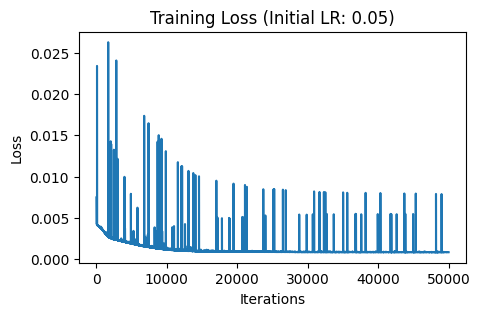

In [13]:
# filtered_data = datalist[(datalist["followers"] > 10000) & (datalist["followers"] < 1000000)]
# data_isVideo = filtered_data[filtered_data["is Photo"] == 0]
data_isVideo = datalist[(datalist["followers"] > 10) & (datalist["followers"] < 10000) & (datalist["is Video"] == 1)]
# xy = filtered_data[[ "followers","is Photo", "hashtag_count", "days_diff", "Like Count"]].to_numpy()
xy_isVideo = data_isVideo[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

x_isVideo = xy_isVideo[:, :-1]
y_isVideo = xy_isVideo[:, -1]
x_processed_isVideo, y_processed_isVideo = preProcessed(x_isVideo, y_isVideo)
x_train_isVideo, y_train_isVideo, x_val_isVideo, y_val_isVideo = split_data(x_processed_isVideo, y_processed_isVideo, split_ratio=0.2)
print(f"x_train shape: {x_train_isVideo.shape}, y_train shape: {y_train_isVideo.shape}")
print(f"x_val shape: {x_val_isVideo.shape}, y_val shape: {y_val_isVideo.shape}")

loss_function = "mse";
layers_dims = [x_train_isVideo.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
activation_fn = ["relu", "relu", "linear"]
learning_rate = 0.05
num_iterations = 50000
print_loss = True
print_freq = 1000
decrease_freq = 1000
decrease_proportion = 0.9
batch_size = 16

model_isVideo = Model(layers_dims, activation_fn, loss_function)
model_isVideo, losses, history = train_model(model_isVideo, x_train_isVideo, y_train_isVideo, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion)

# Plot the loss
plt.figure(figsize=(5, 3))
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Training Loss (Initial LR: {learning_rate})')
plt.show()

x_train shape: (1572, 3), y_train shape: (1572, 1)
x_val shape: (392, 3), y_val shape: (392, 1)
Loss after iteration 0: 0.002233345375968927
Loss after iteration 1000: 2.7605869493730954e-06
Loss after iteration 2000: 1.6100113947689027e-06
Loss after iteration 3000: 1.2068979260832436e-06
Loss after iteration 4000: 1.0164726434786993e-06
Loss after iteration 5000: 9.178785094729073e-07
Loss after iteration 6000: 8.475100393445998e-07
Loss after iteration 7000: 7.909645092048213e-07
Loss after iteration 8000: 7.461022574266671e-07
Loss after iteration 9000: 6.394855195251992e-07
Loss after iteration 10000: 5.705816621665132e-07
Loss after iteration 11000: 5.401520138751745e-07
Loss after iteration 12000: 5.204887463168113e-07
Loss after iteration 13000: 5.027685209162558e-07
Loss after iteration 14000: 4.920292041420705e-07
Loss after iteration 15000: 4.84358224303439e-07
Loss after iteration 16000: 4.7413944463178947e-07
Loss after iteration 17000: 4.6582272376921593e-07
Loss after it

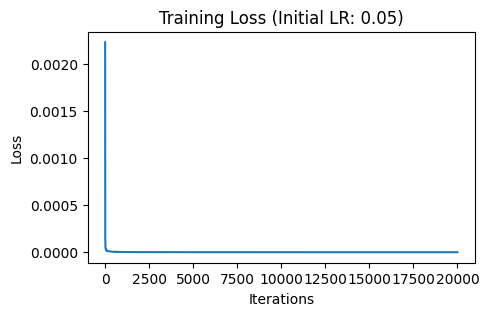

In [14]:
# data_isPhoto = filtered_data[filtered_data["is Photo"] == 1]
data_isPhoto = datalist[(datalist["followers"] > 10000) & (datalist["followers"] < 1000000) & (datalist["is Photo"] == 1)]
xy_isPhoto = data_isPhoto[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

x_isPhoto = xy_isPhoto[:, :-1]
y_isPhoto = xy_isPhoto[:, -1]
x_processed_isPhoto, y_processed_isPhoto = preProcessed(x_isPhoto, y_isPhoto)
x_train_isPhoto, y_train_isPhoto, x_val_isPhoto, y_val_isPhoto = split_data(x_processed_isPhoto, y_processed_isPhoto, split_ratio=0.2)
print(f"x_train shape: {x_train_isPhoto.shape}, y_train shape: {y_train_isPhoto.shape}")
print(f"x_val shape: {x_val_isPhoto.shape}, y_val shape: {y_val_isPhoto.shape}")

loss_function = "mse";
layers_dims = [x_train_isPhoto.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
activation_fn = ["relu", "relu", "linear"]
learning_rate = 0.05
num_iterations = 20000
print_loss = True
print_freq = 1000
decrease_freq = 1000
decrease_proportion = 0.9
batch_size = 16

model_isPhoto = Model(layers_dims, activation_fn, loss_function)
model_isPhoto, losses, history = train_model(model_isPhoto, x_train_isPhoto, y_train_isPhoto, learning_rate, num_iterations, batch_size, print_loss, print_freq, decrease_freq, decrease_proportion)

# Plot the loss
plt.figure(figsize=(5, 3))
plt.plot(losses)
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title(f'Training Loss (Initial LR: {learning_rate})')
plt.show()

In [10]:
def calculate_MAPE(prediction, ground_truth):
    ground_truth = np.where(ground_truth == 0, np.finfo(float).eps, ground_truth) # ensure no 0 in nparray
    mape = np.sum(np.abs((ground_truth - prediction) / ground_truth)) / len(prediction) * 100
    return mape

def predict(x, y_true, model):
    # 預測
    y_pred = model.forward(x)

    if y_true is not None:
        # Mean Squared Error
        mse = np.mean(np.square(y_pred - y_true))
        print(f"MSE : {mse}")

        # Mean Absolute Error
        mae = np.mean(np.abs(y_pred - y_true))
        print(f"MAE : {mae}")

        mape = calculate_MAPE(y_true, y_pred)
        print(f"MAPE {mape:.2f}%")

        # Accuracy (within tolerance)
        # tolerance = 1e-3
        # correct = np.sum(np.isclose(y_pred.flatten(), y_true.flatten(), atol=tolerance))
        # accuracy = correct / len(y_true) * 100
        # print(f"Accuracy (within tolerance of {tolerance}): {accuracy:.2f}%")

    return y_pred


In [ ]:
# # load validation data
# data_val_root = "out.csv"
# with open(data_val_root, newline='') as csvfile:
#     datalist_val = pd.read_csv(data_val_root)

# filtered_data_val = datalist_val[(datalist_val["followers"] > 10000) & (datalist_val["followers"] < 1000000)]
# data_val_isVideo = filtered_data_val[filtered_data_val["is Photo"] == 0]
# xy_val_isVideo = data_val_isVideo[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

# x_val_isVideo = xy_val_isVideo[:, :-1]
# y_val_isVideo = xy_val_isVideo[:, -1]
# x_val_processed_isVideo, y_processed_isVideo = preProcessed(x_isVideo, y_isVideo)

# data_val_isPhoto = filtered_data_val[filtered_data_val["is Photo"] == 1]
# xy_val_isPhoto = data_val_isPhoto[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

# x_val_isPhoto = xy_val_isPhoto[:, :-1]
# y_val_isPhoto = xy_val_isPhoto[:, -1]
# x_val_processed_isPhoto, y_processed_isPhoto = preProcessed(x_isPhoto, y_isPhoto)

In [13]:
data_isPhoto = datalist[(datalist["is Photo"] == 1)]
xy_isPhoto = data_isPhoto[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

data_isVideo = datalist[(datalist["is Video"] == 1)]
xy_isVideo = data_isVideo[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

In [14]:
td_pic = np.array(xy_isPhoto)
td_vid = np.array(xy_isVideo)

In [15]:
td_pic_try1 = []
for i in range(0, 6):
    td_pic_try1.append(td_pic[(td_pic[:, 0] > 10**i) & (td_pic[:, 0] <= 10**(i+1))])
    # print(len(td_pic_try1[len(td_pic_try1) - 1]))

td_pic_try2 = []
for i in range(0, 6):
    td_pic_try2.append(td_pic[(td_pic[:, 0] > 10**i) & (td_pic[:, 0] <= 10**(i+2))])
    # print(len(td_pic_try2[len(td_pic_try2) - 1]))

td_pic_try3 = []
for i in range(0, 6):
    td_pic_try3.append(td_pic[(td_pic[:, 0] > 10**i) & (td_pic[:, 0] <= 10**(i+3))])
    # print(len(td_pic_try3[len(td_pic_try3) - 1]))

td_pic_try4 = []
for i in range(0, 5):
    td_pic_try4.append(td_pic[(td_pic[:, 0] > 10**i) & (td_pic[:, 0] <= 10**(i+4))])
    # print(len(td_pic_try3[len(td_pic_try4) - 1]))

td_pic_try1_5 = []
for i in range(1, 6):
    td_pic_try1_5.append(td_pic[(td_pic[:, 0] > 10**(i-0.5)) & (td_pic[:, 0] > 10**(i+0.5))])
    # print(len(td_pic_try1_5[len(td_pic_try1_5) - 1]))

td_pic_try = td_pic_try1 + td_pic_try2 + td_pic_try3 + td_pic_try4 + td_pic_try1_5
cnt = 0
print("pic lengths: ")
for i in range(len(td_pic_try)):
    cnt+=1
    print(len(td_pic_try[i]), end = ", ")
    if cnt == 6 or cnt == 12 or cnt == 18 or cnt == 23 or cnt == 28:
        print()

td_vid_try1 = []
for i in range(0, 7):
    td_vid_try1.append(td_vid[(td_vid[:, 0] > 10**i) & (td_vid[:, 0] <= 10**(i+1))])

td_vid_try2 = []
for i in range(0, 7):
    td_vid_try2.append(td_vid[(td_vid[:, 0] > 10**i) & (td_vid[:, 0] <= 10**(i+2))])

td_vid_try3 = []
for i in range(0, 6):
    td_vid_try3.append(td_vid[(td_vid[:, 0] > 10**i) & (td_vid[:, 0] <= 10**(i+3))])

td_vid_try4 = []
for i in range(0, 5):
    td_vid_try4.append(td_vid[(td_vid[:, 0] > 10**i) & (td_vid[:, 0] <= 10**(i+4))])

td_vid_try1_5 = []
for i in range(1, 6):
    td_vid_try1_5.append(td_vid[(td_vid[:, 0] > 10**(i-0.5)) & (td_vid[:, 0] > 10**(i+0.5))])

td_vid_try = td_vid_try1 + td_vid_try2 + td_vid_try3 + td_vid_try4 + td_vid_try1_5
cnt = 0
print("vid lengths: ")
for i in range(len(td_vid_try)):
    cnt+=1
    print(len(td_vid_try[i]), end = ", ")
    if cnt == 7 or cnt == 14 or cnt == 20 or cnt == 25 or cnt == 30:
        print()

pic lengths: 
409, 606, 444, 215, 1243, 905, 
1015, 1050, 659, 1458, 2148, 964, 
1459, 1265, 1902, 2363, 2207, 998, 
1674, 2508, 2807, 2422, 2241, 
3209, 2666, 2396, 1645, 333, 
vid lengths: 
621, 947, 780, 371, 1104, 1275, 391, 
1568, 1727, 1151, 1475, 2379, 1666, 427, 
2348, 2098, 2255, 2750, 2770, 1702, 
2719, 3202, 3530, 3141, 2806, 
4513, 3538, 3092, 2353, 916, 


In [16]:
pic_train_MAPEs = []
pic_val_MAPEs = []
vid_train_MAPEs = []
vid_val_MAPEs = []

x_train shape: (403, 3), y_train shape: (403, 1)
training data
Loss after iteration 0: 0.0011841906720974904
Loss after iteration 10000: 2.1259912033462808e-05


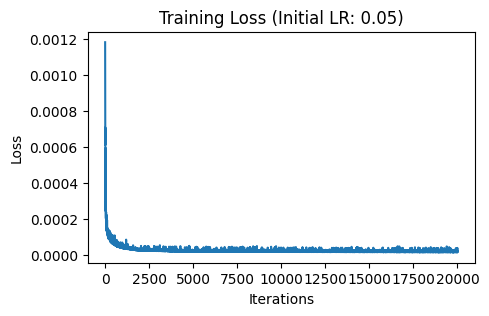

photo post predict:
training data
MSE : 2.0204579123362108e-05
MAE : 0.003590209792863842
MAPE 7.34%
validation data
MSE : 0.022809369977427885
MAE : 0.021704877727254386
MAPE 44.88%
x_train shape: (565, 3), y_train shape: (565, 1)
training data
Loss after iteration 0: 0.006329614778528651
Loss after iteration 10000: 0.004888440098233955


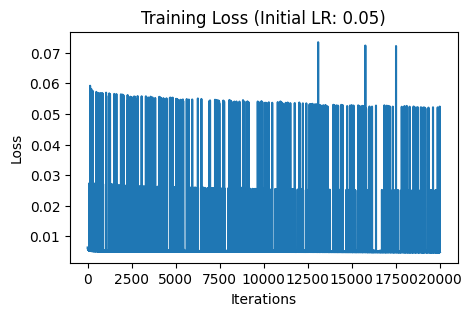

photo post predict:
training data
MSE : 0.005432311241782264
MAE : 0.013460885468131808
MAPE 120.95%
validation data
MSE : 0.033734039607333274
MAE : 0.029982072385417818
MAPE 213.54%
x_train shape: (439, 3), y_train shape: (439, 1)
training data
Loss after iteration 0: 0.002252175168059795
Loss after iteration 10000: 4.6705976884938855e-05


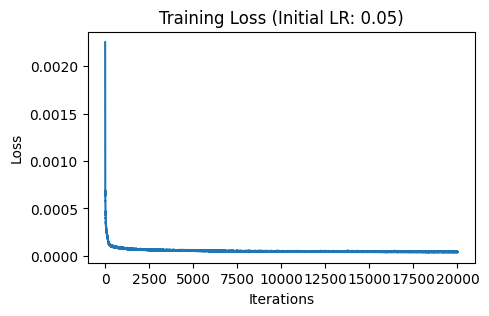

photo post predict:
training data
MSE : 4.147476917218617e-05
MAE : 0.0031870663492666314
MAPE 5.17%
validation data
MSE : 0.038717048428042744
MAE : 0.03581665700925724
MAPE 39.04%
x_train shape: (176, 3), y_train shape: (176, 1)
training data
Loss after iteration 0: 0.03093616957838587
Loss after iteration 10000: 0.0038422103996370582


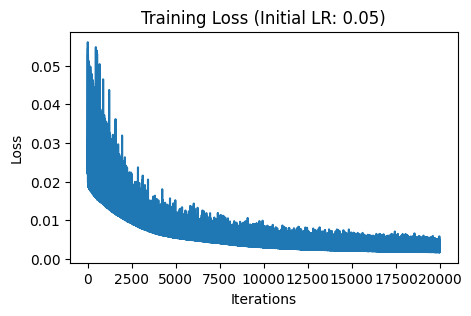

photo post predict:
training data
MSE : 0.002334830259020625
MAE : 0.020890721558320977
MAPE 17.83%
validation data
MSE : 0.0013898660812497643
MAE : 0.02972711015963664
MAPE 25.51%
x_train shape: (1147, 3), y_train shape: (1147, 1)
training data
Loss after iteration 0: 0.0015949441468077559
Loss after iteration 10000: 1.1601692662487135e-06


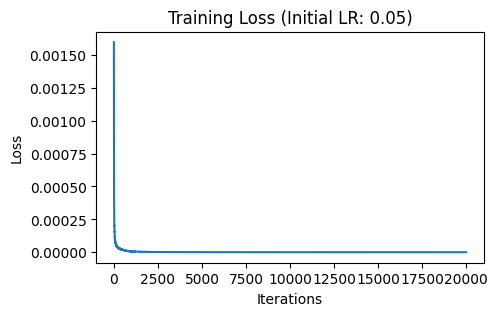

photo post predict:
training data
MSE : 9.204899702542568e-07
MAE : 0.00043838478343308766
MAPE 1.54%
validation data
MSE : 0.010618053958367221
MAE : 0.007229472131004015
MAPE 24.31%
x_train shape: (817, 3), y_train shape: (817, 1)
training data
Loss after iteration 0: 0.23035798523023351
Loss after iteration 10000: 0.04274758405214369


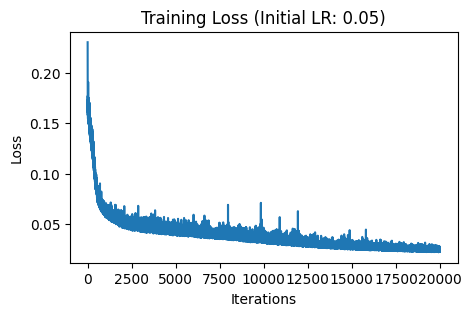

photo post predict:
training data
MSE : 0.02800427755347538
MAE : 0.11205379167595099
MAPE 34.41%
validation data
MSE : 0.15785695378542444
MAE : 0.24282906129096152
MAPE 74.63%
x_train shape: (968, 3), y_train shape: (968, 1)
training data
Loss after iteration 0: 0.0045718480763119245
Loss after iteration 10000: 0.0037742436452557365


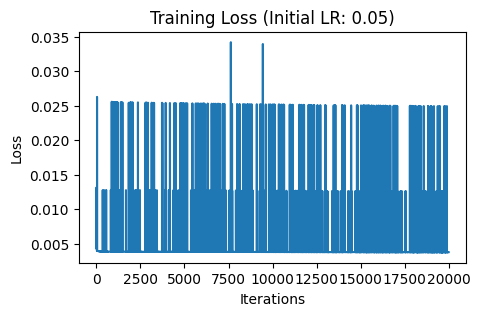

photo post predict:
training data
MSE : 0.0040183979156666215
MAE : 0.00802843348278557
MAPE 31.27%
validation data
MSE : 0.0163865755596425
MAE : 0.019447201129087426
MAPE 44.77%
x_train shape: (1004, 3), y_train shape: (1004, 1)
training data
Loss after iteration 0: 0.007820443410099255
Loss after iteration 10000: 0.004296040893609595


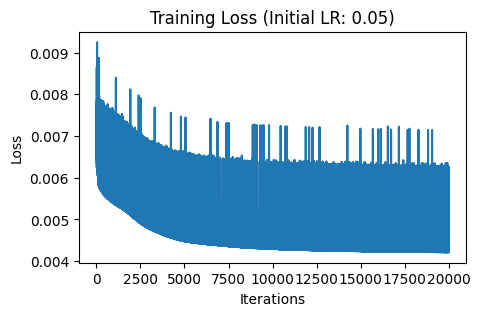

photo post predict:
training data
MSE : 0.004356795279791756
MAE : 0.011666999635992178
MAPE 30.72%
validation data
MSE : 0.041282713664852776
MAE : 0.03425659793694947
MAPE 77.23%
x_train shape: (615, 3), y_train shape: (615, 1)
training data
Loss after iteration 0: 0.19735775163891445
Loss after iteration 10000: 0.022558617604569123


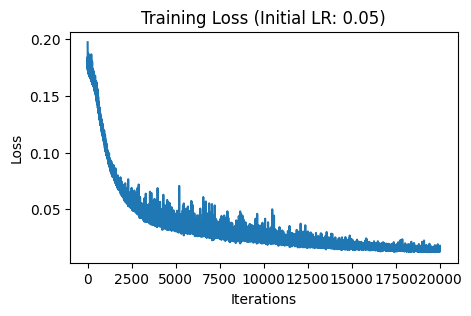

photo post predict:
training data
MSE : 0.022493068204213405
MAE : 0.053674847797785696
MAPE 46.64%
validation data
MSE : 0.011671423521157322
MAE : 0.06981629554934227
MAPE 2781.44%
x_train shape: (1323, 3), y_train shape: (1323, 1)
training data
Loss after iteration 0: 0.007884356545425653
Loss after iteration 10000: 0.0036364994010885656


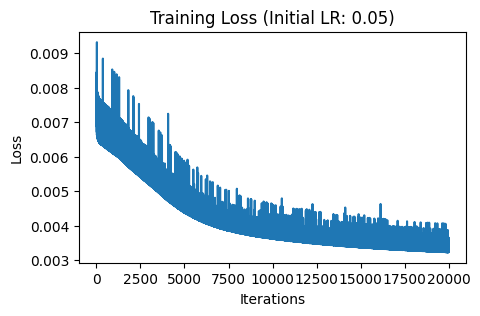

photo post predict:
training data
MSE : 0.0033222421830117043
MAE : 0.007901890387553035
MAPE 11.29%
validation data
MSE : 0.009711817872430088
MAE : 0.010899562514811872
MAPE 39.58%
x_train shape: (1964, 3), y_train shape: (1964, 1)
training data
Loss after iteration 0: 0.001091568159629225
Loss after iteration 10000: 4.5130931346641793e-07


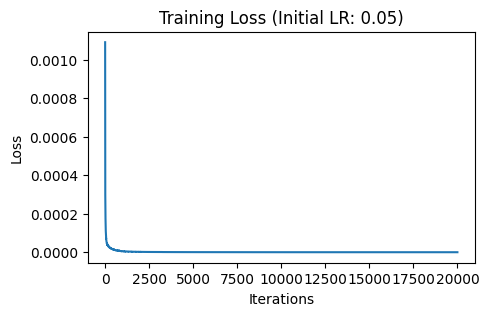

photo post predict:
training data
MSE : 3.741744886136901e-07
MAE : 0.00039216162466057546
MAPE 1.74%
validation data
MSE : 0.007118706164138274
MAE : 0.005177104517157639
MAPE 22.41%
x_train shape: (874, 3), y_train shape: (874, 1)
training data
Loss after iteration 0: 0.1422883332476743
Loss after iteration 10000: 0.0454620332395789


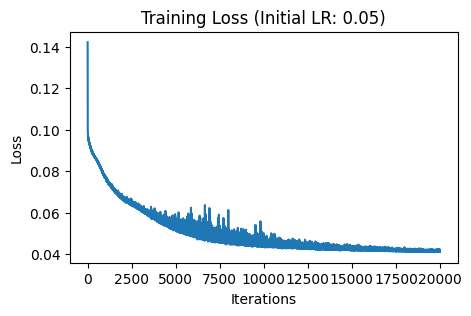

photo post predict:
training data
MSE : 0.040880871660279726
MAE : 0.11930133645815756
MAPE 39.23%
validation data
MSE : 0.08935588318922634
MAE : 0.156601840222869
MAPE 50.37%
x_train shape: (1407, 3), y_train shape: (1407, 1)
training data
Loss after iteration 0: 0.005129506638518879
Loss after iteration 10000: 0.003259273788765454


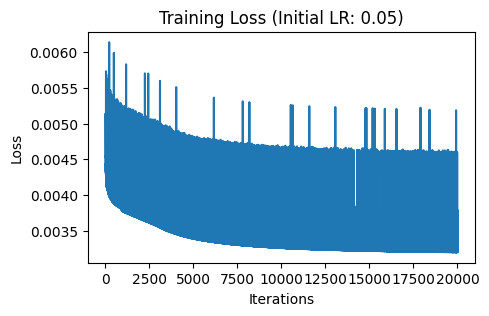

photo post predict:
training data
MSE : 0.0032685615700093276
MAE : 0.009686938655316113
MAPE 46.88%
validation data
MSE : 0.025966523354260328
MAE : 0.030739911684096906
MAPE 63.21%
x_train shape: (1180, 3), y_train shape: (1180, 1)
training data
Loss after iteration 0: 0.06026504281409865
Loss after iteration 10000: 0.0129110385848568


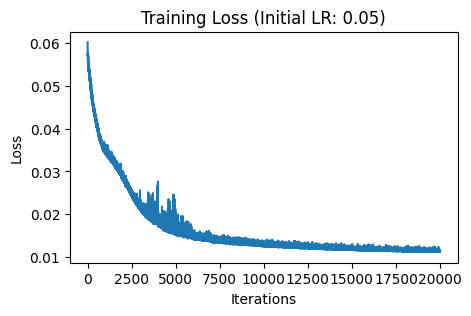

photo post predict:
training data
MSE : 0.011338348142263845
MAE : 0.032117450413774146
MAPE 25.40%
validation data
MSE : 0.17785976438286846
MAE : 0.1986099004389069
MAPE 34.30%
x_train shape: (1762, 3), y_train shape: (1762, 1)
training data
Loss after iteration 0: 0.0051987643601789715
Loss after iteration 10000: 0.0032213937821258835


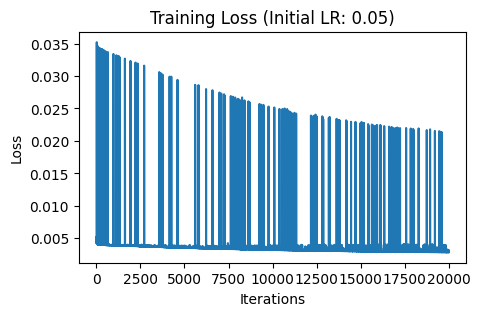

photo post predict:
training data
MSE : 0.0029874274544533126
MAE : 0.00821320092647315
MAPE 30.48%
validation data
MSE : 0.009772688526877875
MAE : 0.024908001095003886
MAPE 49.44%
x_train shape: (2140, 3), y_train shape: (2140, 1)
training data
Loss after iteration 0: 0.004310536327416673
Loss after iteration 10000: 0.002945585113613952


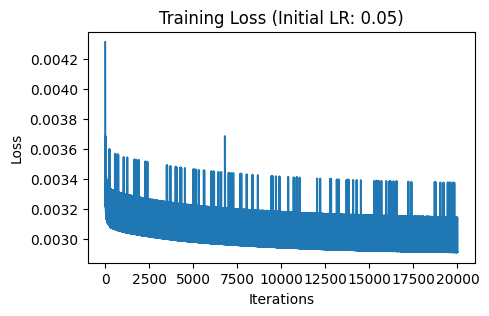

photo post predict:
training data
MSE : 0.0029381456360986864
MAE : 0.006611250581581787
MAPE 13.19%
validation data
MSE : 0.006988607345989982
MAE : 0.010754010504443941
MAPE 31.87%
x_train shape: (2021, 3), y_train shape: (2021, 1)
training data
Loss after iteration 0: 0.0011513336011685512
Loss after iteration 10000: 4.827292600803959e-07


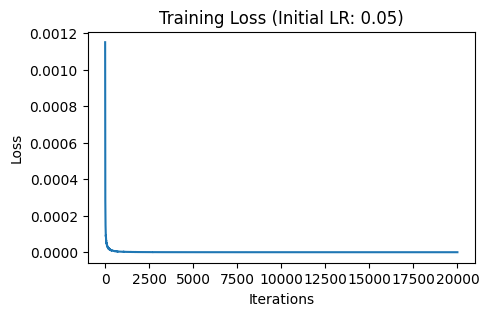

photo post predict:
training data
MSE : 4.547766446133002e-07
MAE : 0.00037253010367442114
MAPE 1.70%
validation data
MSE : 0.006944194665815602
MAE : 0.004816060787234038
MAPE 22.09%
x_train shape: (907, 3), y_train shape: (907, 1)
training data
Loss after iteration 0: 0.14774292898324615
Loss after iteration 10000: 0.07450809730892018


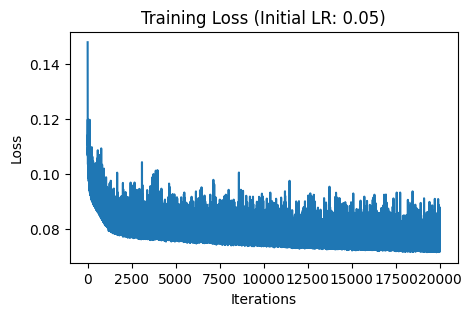

photo post predict:
training data
MSE : 0.07510518187925878
MAE : 0.13863223967064808
MAPE 100.23%
validation data
MSE : 0.05359256195685278
MAE : 0.1296669670721249
MAPE 61.16%
x_train shape: (1583, 3), y_train shape: (1583, 1)
training data
Loss after iteration 0: 0.047924293311871854
Loss after iteration 10000: 0.005204396046267859


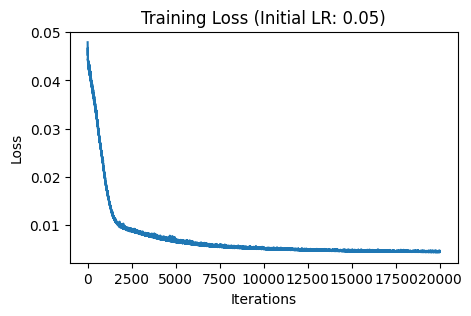

photo post predict:
training data
MSE : 0.004412603569629717
MAE : 0.01582925576174525
MAPE 21.13%
validation data
MSE : 0.1100536455203895
MAE : 0.10691457417409989
MAPE 719.47%
x_train shape: (2327, 3), y_train shape: (2327, 1)
training data
Loss after iteration 0: 0.005297274808529178
Loss after iteration 10000: 0.003430223081135089


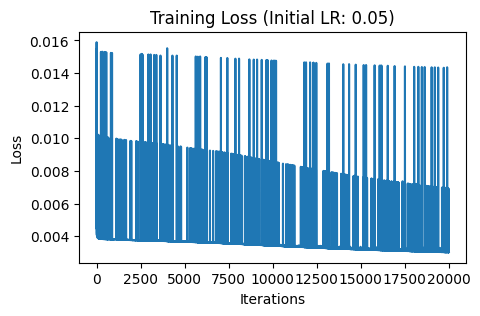

photo post predict:
training data
MSE : 0.0031063821738556803
MAE : 0.008965987067391509
MAPE 156.40%
validation data
MSE : 0.0064265872157053885
MAE : 0.013084036907257618
MAPE 1261.41%
x_train shape: (2579, 3), y_train shape: (2579, 1)
training data
Loss after iteration 0: 0.004919267872284518
Loss after iteration 10000: 0.0019676174695672263


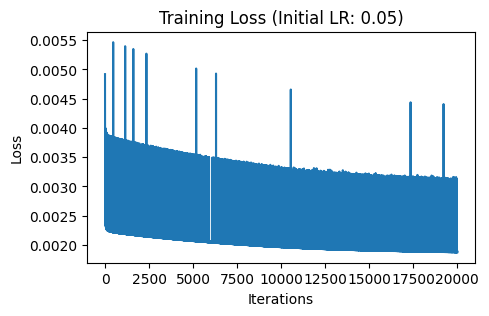

photo post predict:
training data
MSE : 0.0019201625034926681
MAE : 0.004768791221380551
MAPE 8.68%
validation data
MSE : 0.00721281244315765
MAE : 0.015743723224233272
MAPE 31.05%
x_train shape: (2197, 3), y_train shape: (2197, 1)
training data
Loss after iteration 0: 0.003917074602401955
Loss after iteration 10000: 0.002830750285108117


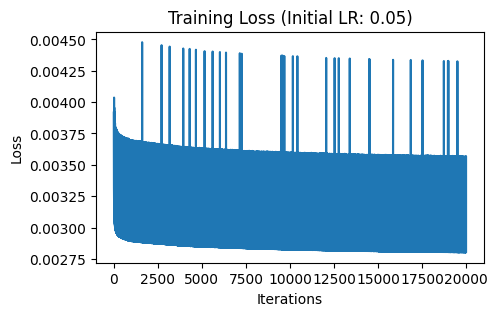

photo post predict:
training data
MSE : 0.002856626528150904
MAE : 0.005936682697229321
MAPE 11.38%
validation data
MSE : 0.006784659010203719
MAE : 0.009771862303426566
MAPE 29.87%
x_train shape: (2054, 3), y_train shape: (2054, 1)
training data
Loss after iteration 0: 0.01183550239766756
Loss after iteration 10000: 0.007188901377825278


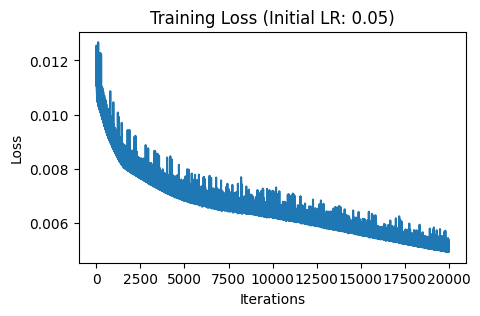

photo post predict:
training data
MSE : 0.004982132970634184
MAE : 0.0066103930876710865
MAPE 9.75%
validation data
MSE : 0.00688247472566836
MAE : 0.004997820995651815
MAPE 23.25%
x_train shape: (2973, 3), y_train shape: (2973, 1)
training data
Loss after iteration 0: 0.014004242500737066
Loss after iteration 10000: 0.011300330419240884


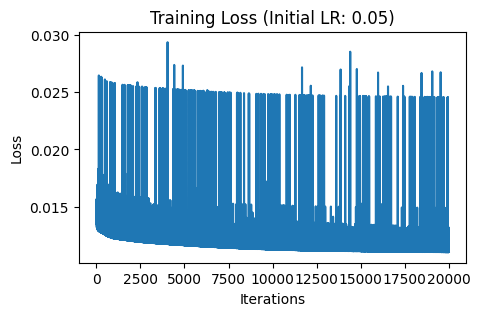

photo post predict:
training data
MSE : 0.011284703825323658
MAE : 0.013169474506094828
MAPE 32.20%
validation data
MSE : 0.005267913894383117
MAE : 0.007836032751550131
MAPE 40.31%
x_train shape: (2438, 3), y_train shape: (2438, 1)
training data
Loss after iteration 0: 0.01068832801079804
Loss after iteration 10000: 0.00659357446948315


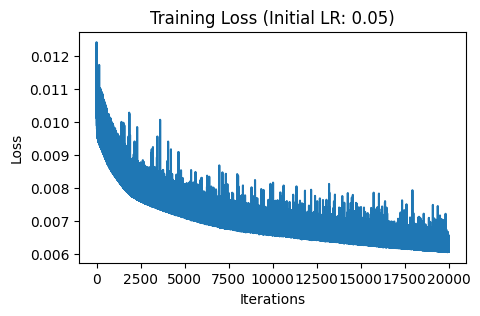

photo post predict:
training data
MSE : 0.006149008309098018
MAE : 0.010326838272963455
MAPE 36.57%
validation data
MSE : 0.0076888379498760194
MAE : 0.015881532110028795
MAPE 32.35%
x_train shape: (2198, 3), y_train shape: (2198, 1)
training data
Loss after iteration 0: 0.013144923513580506
Loss after iteration 10000: 0.008096382756050007


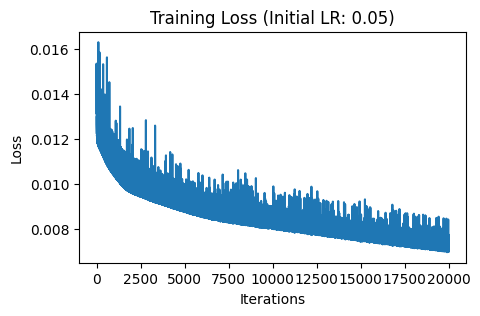

photo post predict:
training data
MSE : 0.007130410239931747
MAE : 0.011611880420039482
MAPE 12.91%
validation data
MSE : 0.006986174643740551
MAE : 0.010799760540587493
MAPE 31.93%
x_train shape: (1499, 3), y_train shape: (1499, 1)
training data
Loss after iteration 0: 0.0006935092928709093
Loss after iteration 10000: 2.12022184170644e-06


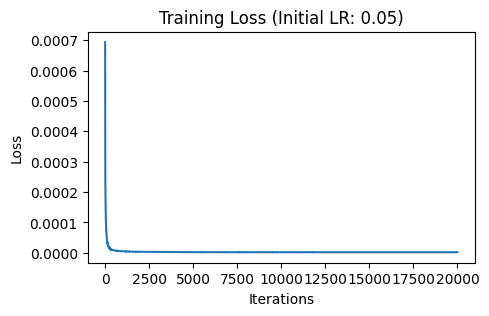

photo post predict:
training data
MSE : 2.075029227460615e-06
MAE : 0.000473280630067498
MAPE 2.08%
validation data
MSE : 0.008721258730744643
MAE : 0.005942133499321595
MAPE 22.26%
x_train shape: (327, 3), y_train shape: (327, 1)
training data
Loss after iteration 0: 0.11856176528944559
Loss after iteration 10000: 0.03804545734932677


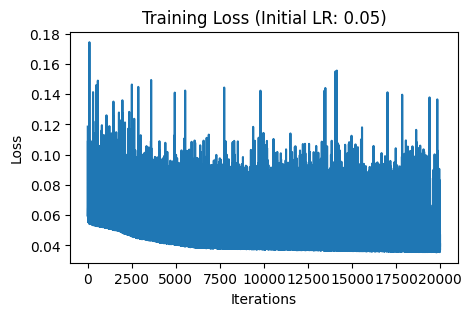

photo post predict:
training data
MSE : 0.04330762251229614
MAE : 0.11283496595556024
MAPE 140.84%
validation data
MSE : 0.09137211575245284
MAE : 0.15496834591013392
MAPE 68.18%


In [17]:
for i in td_pic_try:
    x_isPhoto = i[:, :-1]
    y_isPhoto = i[:, -1]
    x_processed_isPhoto, y_processed_isPhoto = preProcessed(x_isPhoto, y_isPhoto)
    print(f"x_train shape: {x_processed_isPhoto.shape}, y_train shape: {y_processed_isPhoto.shape}")

    x_train_isPhoto, y_train_isPhoto, x_val_isPhoto, y_val_isPhoto = split_data(
        x_processed_isPhoto[:, :-1], y_processed_isPhoto[:, -1].reshape(-1, 1), split_ratio=0.2
    )

    print("training data")
    loss_function = "mse";
    layers_dims = [x_train_isPhoto.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
    activation_fn = ["relu", "relu", "linear"]
    learning_rate = 0.05
    num_iterations = 20000
    print_loss = True
    print_freq = 10000
    decrease_freq = 1000
    decrease_proportion = 0.9
    batch_size = 64

    model_isPhoto = Model(layers_dims, activation_fn, loss_function)
    model_isPhoto, losses, history = train_model(
        model_isPhoto, x_train_isPhoto, y_train_isPhoto, learning_rate, num_iterations,
        batch_size, print_loss, print_freq, decrease_freq, decrease_proportion
    )

    # Plot the loss
    plt.figure(figsize=(5, 3))
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Initial LR: {learning_rate})')
    plt.show()

    print("photo post predict:")
    print("training data")
    pred_train = predict(x_train_isPhoto, y_train_isPhoto, model_isPhoto)
    pic_train_MAPEs.append(pred_train)
    print("validation data")
    pred_val = predict(x_val_isPhoto, y_val_isPhoto, model_isPhoto)
    pic_val_MAPEs.append(pred_val)
    # print(pic_train_MAPEs)
    # print(pic_val_MAPEs)

x_train shape: (616, 3), y_train shape: (616, 1)
training data
Loss after iteration 0: 0.22869757979049507
Loss after iteration 10000: 0.1058210974852049


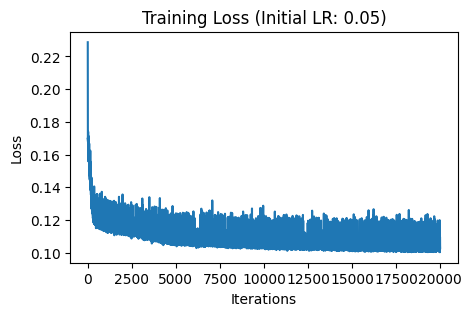

video post predict:
training data
MSE : 0.10303671355394281
MAE : 0.21586121513992987
MAPE 235.12%
validation data
MSE : 0.17917517424462534
MAE : 0.2920760438839769
MAPE 120.63%
x_train shape: (927, 3), y_train shape: (927, 1)
training data
Loss after iteration 0: 0.004602962451776426
Loss after iteration 10000: 0.002722724883949232


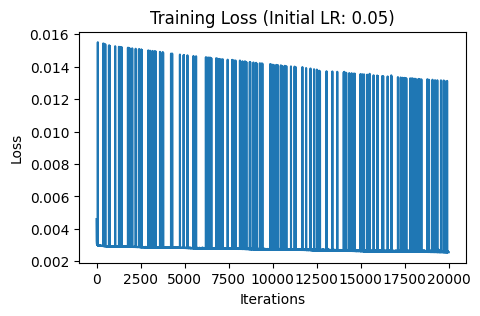

video post predict:
training data
MSE : 0.0026450523698245813
MAE : 0.004952642497680465
MAPE 80.94%
validation data
MSE : 0.00026215820384847686
MAE : 0.004789613119898573
MAPE 19.88%
x_train shape: (764, 3), y_train shape: (764, 1)
training data
Loss after iteration 0: 0.031188286567414746
Loss after iteration 10000: 0.015969929501271525


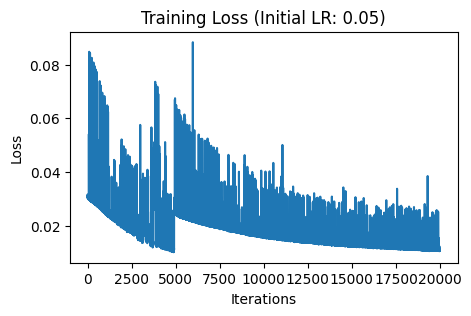

video post predict:
training data
MSE : 0.010881088217306078
MAE : 0.030765747461127653
MAPE 57.62%
validation data
MSE : 0.1877119039200632
MAE : 0.14190763398481937
MAPE 305.14%
x_train shape: (340, 3), y_train shape: (340, 1)
training data
Loss after iteration 0: 0.13734476323341116
Loss after iteration 10000: 0.016833919986321735


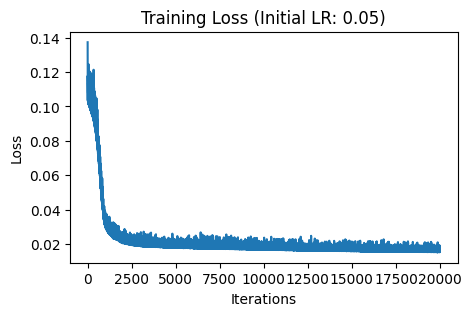

video post predict:
training data
MSE : 0.01600411998492899
MAE : 0.053600374600963646
MAPE 48.55%
validation data
MSE : 0.10540011280876048
MAE : 0.19592669736054577
MAPE 59.91%
x_train shape: (1037, 3), y_train shape: (1037, 1)
training data
Loss after iteration 0: 0.09625157650101633
Loss after iteration 10000: 0.04286279432901231


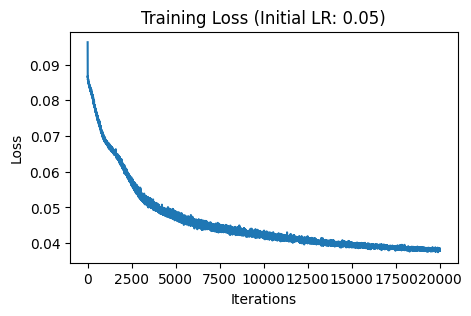

video post predict:
training data
MSE : 0.037313554359379004
MAE : 0.09026564143285108
MAPE 45.49%
validation data
MSE : 0.10574775278958394
MAE : 0.19157899037873738
MAPE 79.81%
x_train shape: (1196, 3), y_train shape: (1196, 1)
training data
Loss after iteration 0: 0.11915369738541758
Loss after iteration 10000: 0.051590838797396996


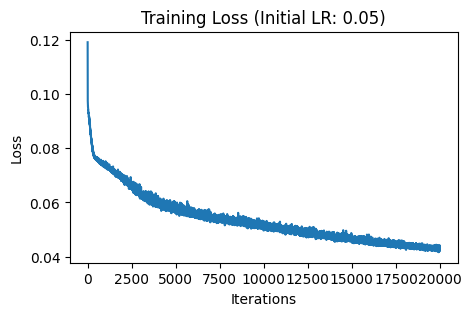

video post predict:
training data
MSE : 0.04099408249243642
MAE : 0.11498890604819657
MAPE 52.12%
validation data
MSE : 0.22469200714279333
MAE : 0.2583976981126145
MAPE 169.45%
x_train shape: (363, 3), y_train shape: (363, 1)
training data
Loss after iteration 0: 0.23353287042893428
Loss after iteration 10000: 0.06431132055272516


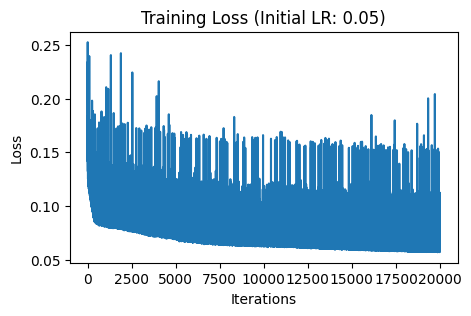

video post predict:
training data
MSE : 0.06265507995848613
MAE : 0.12962636754536006
MAPE 31.13%
validation data
MSE : 0.15044069643604305
MAE : 0.2874729877931663
MAPE 72.66%
x_train shape: (1543, 3), y_train shape: (1543, 1)
training data
Loss after iteration 0: 0.0030777381843263354
Loss after iteration 10000: 0.002036542504768949


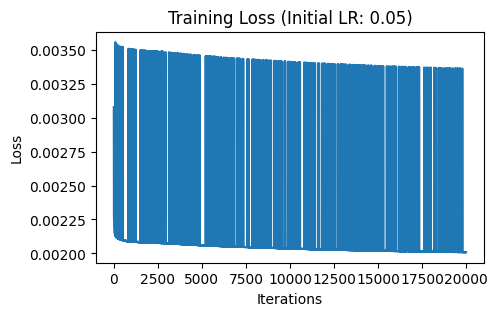

video post predict:
training data
MSE : 0.0020292640645397752
MAE : 0.0044282808370632865
MAPE 147.23%
validation data
MSE : 4.911107277209176e-05
MAE : 0.0034717169810943873
MAPE 23.95%
x_train shape: (1691, 3), y_train shape: (1691, 1)
training data
Loss after iteration 0: 0.0029066595810560533
Loss after iteration 10000: 0.001869297780507786


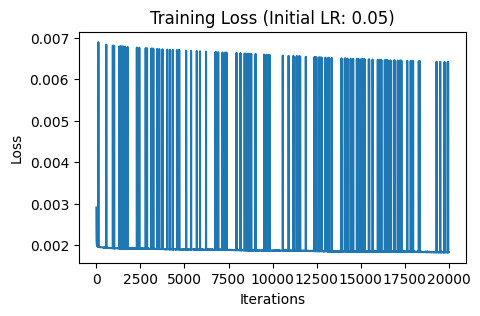

video post predict:
training data
MSE : 0.0018598173018181173
MAE : 0.00340595530614195
MAPE 81.05%
validation data
MSE : 3.458770191961724e-05
MAE : 0.0024776698215058816
MAPE 134.76%
x_train shape: (1104, 3), y_train shape: (1104, 1)
training data
Loss after iteration 0: 0.09270364759328609
Loss after iteration 10000: 0.03530705077399594


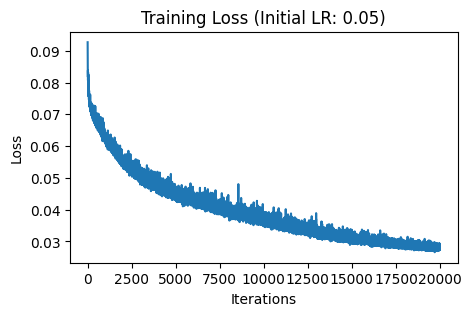

video post predict:
training data
MSE : 0.02708862734027131
MAE : 0.06746807919729914
MAPE 29.75%
validation data
MSE : 0.2090847548143395
MAE : 0.28269000395658683
MAPE 110.07%
x_train shape: (1377, 3), y_train shape: (1377, 1)
training data
Loss after iteration 0: 0.09711878052538912
Loss after iteration 10000: 0.044333724587814434


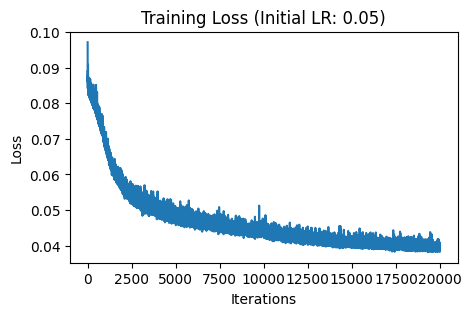

video post predict:
training data
MSE : 0.0385285372566517
MAE : 0.10607556106467703
MAPE 76.30%
validation data
MSE : 0.08515015367720243
MAE : 0.19448017347794844
MAPE 354.64%
x_train shape: (2233, 3), y_train shape: (2233, 1)
training data
Loss after iteration 0: 0.06982050184889561
Loss after iteration 10000: 0.048401395005463664


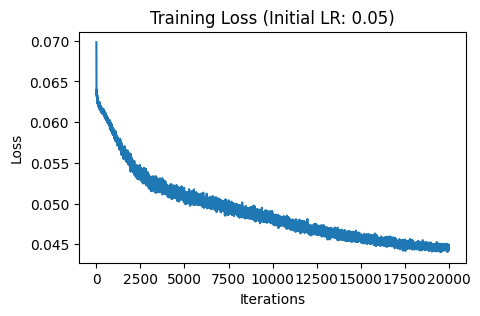

video post predict:
training data
MSE : 0.043967590382908435
MAE : 0.1202347913642127
MAPE 101.29%
validation data
MSE : 0.07325819572932073
MAE : 0.1642332930664803
MAPE 822.48%
x_train shape: (1559, 3), y_train shape: (1559, 1)
training data
Loss after iteration 0: 0.13703894119717827
Loss after iteration 10000: 0.07470981344671113


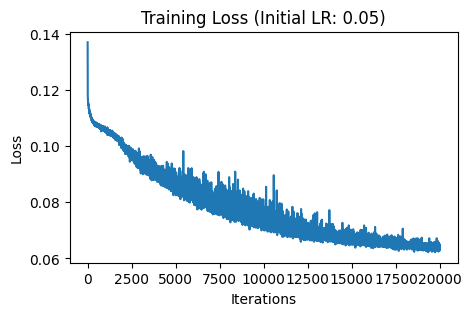

video post predict:
training data
MSE : 0.062124259264677996
MAE : 0.13645763762028718
MAPE 395.02%
validation data
MSE : 0.23760732071765364
MAE : 0.321446160882288
MAPE 133.49%
x_train shape: (399, 3), y_train shape: (399, 1)
training data
Loss after iteration 0: 0.2602596113067328
Loss after iteration 10000: 0.12227739123177683


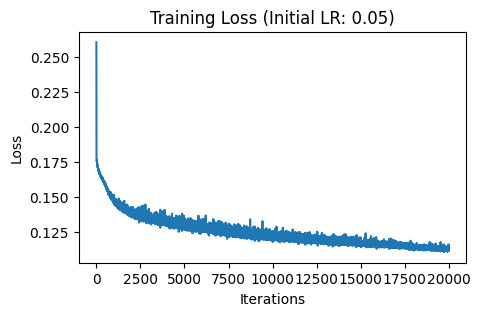

video post predict:
training data
MSE : 0.11165885982518123
MAE : 0.1788454487618552
MAPE 222.84%
validation data
MSE : 0.18975004119739722
MAE : 0.3510870799181108
MAPE 91.52%
x_train shape: (2307, 3), y_train shape: (2307, 1)
training data
Loss after iteration 0: 0.0023433612453991576
Loss after iteration 10000: 0.0015378387596141022


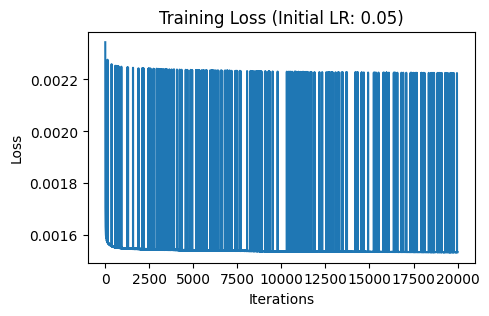

video post predict:
training data
MSE : 0.0015427735712640308
MAE : 0.002361246131175165
MAPE 150.86%
validation data
MSE : 2.610455998503003e-05
MAE : 0.0020288091790538797
MAPE 41.91%
x_train shape: (2031, 3), y_train shape: (2031, 1)
training data
Loss after iteration 0: 0.006450608134903759
Loss after iteration 10000: 0.005444994716410855


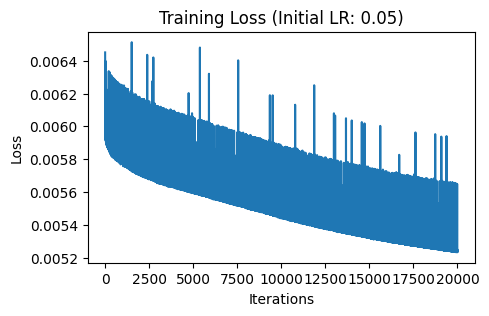

video post predict:
training data
MSE : 0.005250460621679678
MAE : 0.009550122911228325
MAPE 20.18%
validation data
MSE : 0.0021993177850589338
MAE : 0.0197151407452417
MAPE 264.07%
x_train shape: (2141, 3), y_train shape: (2141, 1)
training data
Loss after iteration 0: 0.0774574285604273
Loss after iteration 10000: 0.030812235145551974


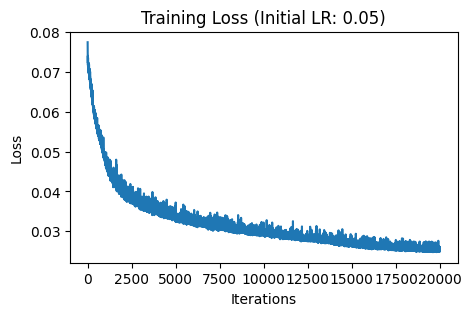

video post predict:
training data
MSE : 0.024516440469012177
MAE : 0.06529601255344739
MAPE 65.41%
validation data
MSE : 0.11332553419339031
MAE : 0.21441283630562932
MAPE 125.14%
x_train shape: (2573, 3), y_train shape: (2573, 1)
training data
Loss after iteration 0: 0.07896417171095171
Loss after iteration 10000: 0.05214485650230727


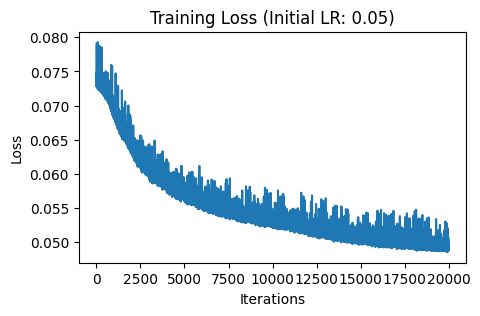

video post predict:
training data
MSE : 0.04928799098617695
MAE : 0.12839426228329653
MAPE 109.98%
validation data
MSE : 0.2411589490777012
MAE : 0.2052125400731793
MAPE 213.86%
x_train shape: (2596, 3), y_train shape: (2596, 1)
training data
Loss after iteration 0: 0.09856201585265388
Loss after iteration 10000: 0.05302907394046008


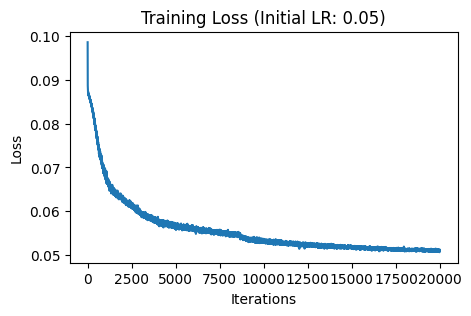

video post predict:
training data
MSE : 0.05056873245206754
MAE : 0.11848988466768835
MAPE 50.86%
validation data
MSE : 0.13074006024951168
MAE : 0.21012328918890125
MAPE 95.24%
x_train shape: (1595, 3), y_train shape: (1595, 1)
training data
Loss after iteration 0: 0.1702914409083169
Loss after iteration 10000: 0.11384836222684018


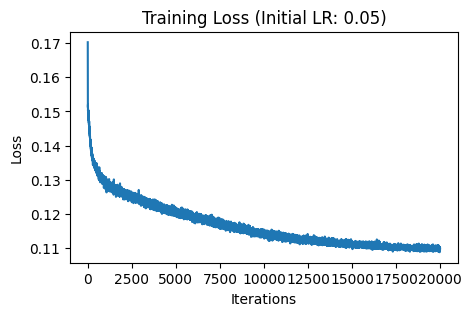

video post predict:
training data
MSE : 0.10862466833283889
MAE : 0.15988455167082138
MAPE 149.69%
validation data
MSE : 0.2745492746798267
MAE : 0.2869054040944484
MAPE 92.16%
x_train shape: (2647, 3), y_train shape: (2647, 1)
training data
Loss after iteration 0: 0.0032939925531130405
Loss after iteration 10000: 0.002113010312308821


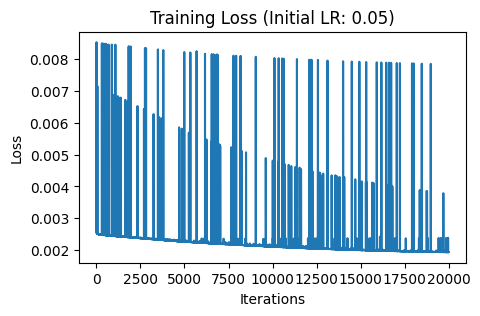

video post predict:
training data
MSE : 0.001957002979314386
MAE : 0.003998205248337714
MAPE 64.02%
validation data
MSE : 0.009956414924169904
MAE : 0.022272266037195523
MAPE 356.17%
x_train shape: (3068, 3), y_train shape: (3068, 1)
training data
Loss after iteration 0: 0.05678828189970617
Loss after iteration 10000: 0.01847868064177218


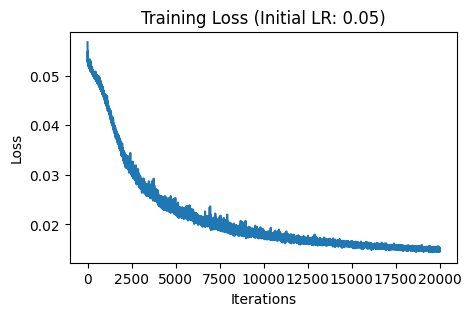

video post predict:
training data
MSE : 0.014182362191302431
MAE : 0.0314095847587856
MAPE 8216.43%
validation data
MSE : 0.19425568013271077
MAE : 0.1750994131713861
MAPE 181.00%
x_train shape: (3337, 3), y_train shape: (3337, 1)
training data
Loss after iteration 0: 0.07958931388694382
Loss after iteration 10000: 0.05146436173765774


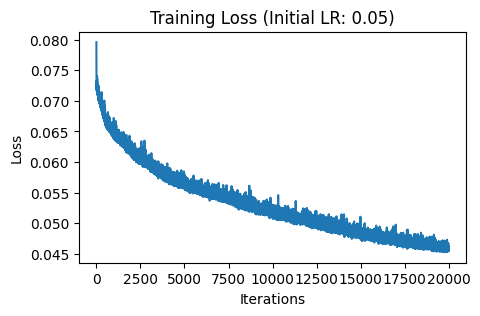

video post predict:
training data
MSE : 0.04487996356321187
MAE : 0.1017725208250041
MAPE 62.23%
validation data
MSE : 0.11256040665087962
MAE : 0.1864115737530478
MAPE 89.75%
x_train shape: (2936, 3), y_train shape: (2936, 1)
training data
Loss after iteration 0: 0.08780984691952981
Loss after iteration 10000: 0.056555489499826035


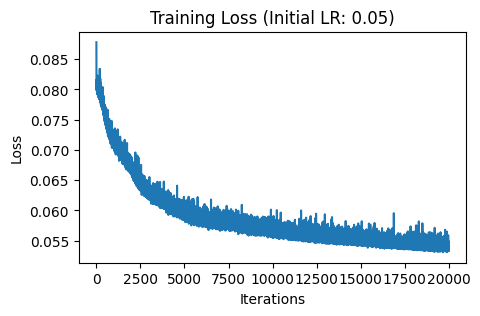

video post predict:
training data
MSE : 0.053227786924117004
MAE : 0.11410934255178588
MAPE 46.20%
validation data
MSE : 0.12503062978609025
MAE : 0.183169736027129
MAPE 80.54%
x_train shape: (2632, 3), y_train shape: (2632, 1)
training data
Loss after iteration 0: 0.10512592811038347
Loss after iteration 10000: 0.061794307854239394


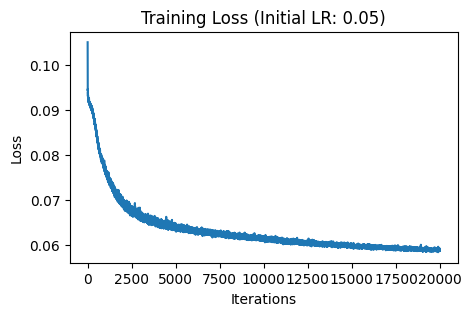

video post predict:
training data
MSE : 0.05859182965785411
MAE : 0.1304342509944899
MAPE 69.72%
validation data
MSE : 0.13245888865808686
MAE : 0.1997723857230106
MAPE 87.35%
x_train shape: (4285, 3), y_train shape: (4285, 1)
training data
Loss after iteration 0: 0.07521942939316097
Loss after iteration 10000: 0.06042274119651482


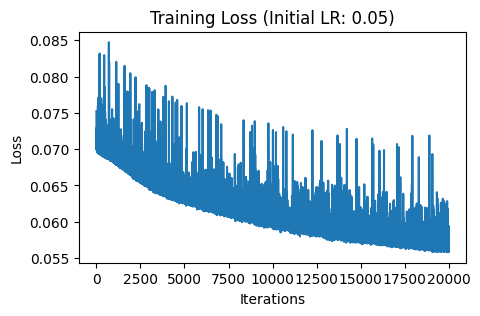

video post predict:
training data
MSE : 0.05859423012941968
MAE : 0.12069783008107492
MAPE 5471.81%
validation data
MSE : 0.07490634820717708
MAE : 0.13951560170052427
MAPE 368.25%
x_train shape: (3321, 3), y_train shape: (3321, 1)
training data
Loss after iteration 0: 0.0736849490470682
Loss after iteration 10000: 0.05159268229045265


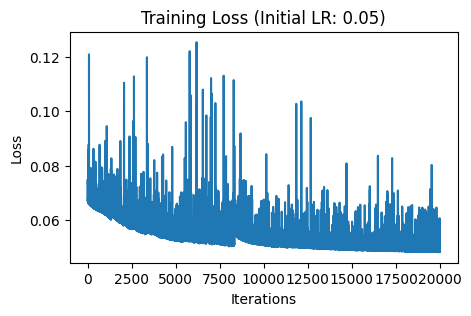

video post predict:
training data
MSE : 0.048794032874537145
MAE : 0.11200768860947967
MAPE 77.09%
validation data
MSE : 0.08757460963330194
MAE : 0.14980255191387112
MAPE 71.79%
x_train shape: (2893, 3), y_train shape: (2893, 1)
training data
Loss after iteration 0: 0.09430031466584474
Loss after iteration 10000: 0.062163806966100715


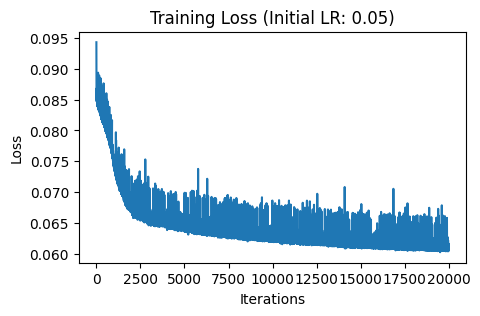

video post predict:
training data
MSE : 0.06073482906923473
MAE : 0.12289039635579029
MAPE 55.37%
validation data
MSE : 0.08909259991102454
MAE : 0.15846293739108414
MAPE 62.32%
x_train shape: (2204, 3), y_train shape: (2204, 1)
training data
Loss after iteration 0: 0.10666910394360639
Loss after iteration 10000: 0.07310813316023011


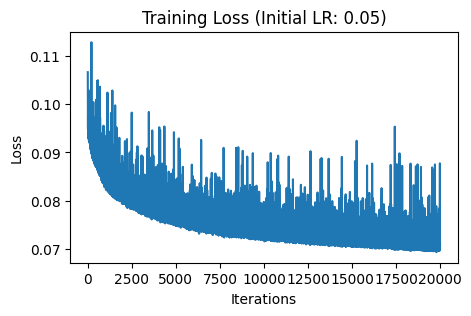

video post predict:
training data
MSE : 0.0703453350806973
MAE : 0.13644970411866758
MAPE 63.16%
validation data
MSE : 0.18463396526549228
MAE : 0.23303459707714919
MAPE 145.51%
x_train shape: (849, 3), y_train shape: (849, 1)
training data
Loss after iteration 0: 0.13575171107017658
Loss after iteration 10000: 0.07233232046327362


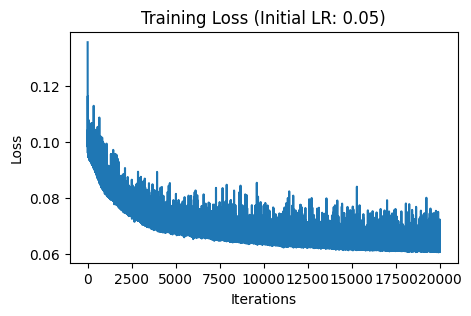

video post predict:
training data
MSE : 0.06282201629795721
MAE : 0.1376025397012644
MAPE 422.47%
validation data
MSE : 0.08234802208312782
MAE : 0.19438610209804066
MAPE 403.44%


In [23]:
for i in td_vid_try:
    x_isVideo = i[:, :-1]
    y_isVideo = i[:, -1]
    x_processed_isVideo, y_processed_isVideo = preProcessed(x_isVideo, y_isVideo)
    print(f"x_train shape: {x_processed_isVideo.shape}, y_train shape: {y_processed_isVideo.shape}")

    x_train_isVideo, y_train_isVideo, x_val_isVideo, y_val_isVideo = split_data(
        x_processed_isVideo[:, :-1], y_processed_isVideo[:, -1].reshape(-1, 1), split_ratio=0.2
    )
    print("training data")
    loss_function = "mse";
    layers_dims = [x_train_isVideo.shape[-1], 32, 16, 1] # linear for converge, sigmoid for diverge
    activation_fn = ["relu", "relu", "linear"]
    learning_rate = 0.05
    num_iterations = 20000
    print_loss = True
    print_freq = 10000
    decrease_freq = 1000
    decrease_proportion = 0.9
    batch_size = 32

    model_isVideo = Model(layers_dims, activation_fn, loss_function)
    model_isVideo, losses, history = train_model(
        model_isVideo, x_train_isVideo, y_train_isVideo, learning_rate, num_iterations,
        batch_size, print_loss, print_freq, decrease_freq, decrease_proportion
    )

    # Plot the loss
    plt.figure(figsize=(5, 3))
    plt.plot(losses)
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.title(f'Training Loss (Initial LR: {learning_rate})')
    plt.show()
    print("video post predict:")
    print("training data")
    pred_train = predict(x_train_isVideo, y_train_isVideo, model_isVideo)
    vid_train_MAPEs.append(pred_train)
    print("validation data")
    pred_val = predict(x_val_isVideo, y_val_isVideo, model_isVideo)
    vid_val_MAPEs.append(pred_val)
    # print(vid_train_MAPEs)
    # print(vid_val_MAPEs)

In [24]:
print("photo post predict:")
print("training data")
pred_train = predict(x_train_isPhoto, y_train_isPhoto, model_isPhoto)
print("validation data")
pred_val = predict(x_val_isPhoto, y_val_isPhoto, model_isPhoto)
print("video post predict:")
print("training data")
pred_train = predict(x_train_isVideo, y_train_isVideo, model_isVideo)
print("validation data")
pred_val = predict(x_val_isVideo, y_val_isVideo, model_isVideo)
# save_final_result(model, x_train, y_train)
# animate_training(history, x_train, y_train)

photo post predict:
training data
MSE : 0.04330762251229614
MAE : 0.11283496595556024
MAPE 140.84%
validation data
MSE : 0.09137211575245284
MAE : 0.15496834591013392
MAPE 68.18%
video post predict:
training data
MSE : 0.06282201629795721
MAE : 0.1376025397012644
MAPE 422.47%
validation data
MSE : 0.08234802208312782
MAE : 0.19438610209804066
MAPE 403.44%


In [ ]:
df = pd.DataFrame({
    'ID': range(len(pred_train)),
    'Label': pred_train.flatten()
})

df.to_csv('training_output.csv', index=False)
print("Prediction data saved as 'training_output.csv'")

Prediction data saved as 'training_output.csv'


In [ ]:
# load training data
data_root = "test_out.csv"
with open(data_root, newline='') as csvfile:
    datalist = pd.read_csv(data_root)

In [ ]:
data_isPhoto = datalist[(datalist["followers"] > 10000) & (datalist["followers"] < 1000000) & (datalist["is Photo"] == 1)]
xy_isPhoto = data_isPhoto[[ "followers", "hashtag_count", "days_diff", "Like Count"]].to_numpy()

x_isPhoto = xy_isPhoto[:, :-1]
y_isPhoto = xy_isPhoto[:, -1]
x_processed_isPhoto, y_processed_isPhoto = preProcessed(x_isPhoto, y_isPhoto)
x_train_isPhoto, y_train_isPhoto, x_val_isPhoto, y_val_isPhoto = split_data(x_processed_isPhoto, y_processed_isPhoto, split_ratio=0.2)
print(f"x_train shape: {x_train_isPhoto.shape}, y_train shape: {y_train_isPhoto.shape}")
print(f"x_val shape: {x_val_isPhoto.shape}, y_val shape: {y_val_isPhoto.shape}")